In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# 1) Two circles:

### 1.1) Decision Boundary:

In [5]:
X, y = make_circles(n_samples=500, noise=0.1)
X[y==0, :] *= 1.8

In [6]:
print(X.shape, y.shape)

(500, 2) (500,)


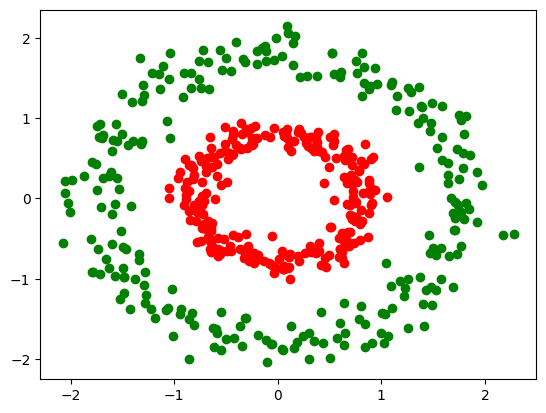

In [9]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='green')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red')

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [11]:
lgr = LogisticRegression()
lgr.fit(X, y)

LogisticRegression()

In [12]:
steps = [('poly_feature', PolynomialFeatures(degree=2)),
         ('lgr', LogisticRegression(fit_intercept=False))]

poly_lgr = Pipeline(steps=steps)

poly_lgr.fit(X, y)

Pipeline(steps=[('poly_feature', PolynomialFeatures()),
                ('lgr', LogisticRegression(fit_intercept=False))])

In [13]:
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

In [14]:
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                     np.linspace(x2_min, x2_max, 500))

X_input = np.c_[xx.reshape(-1), yy.reshape(-1)]

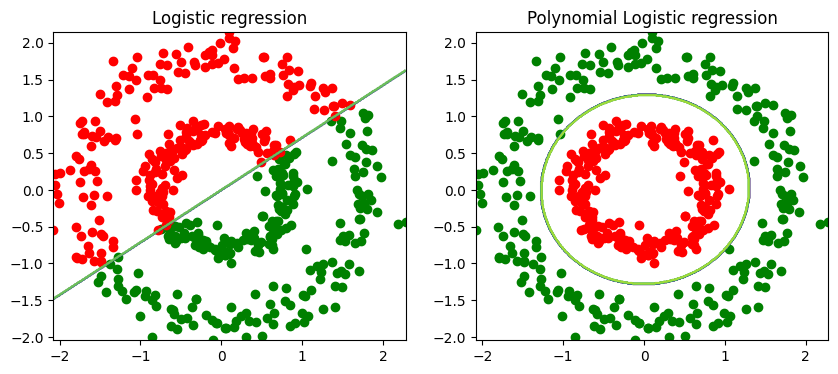

In [15]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Logistic regression')
plt.contour(xx, yy, lgr.predict(X=X_input).reshape((500, 500)), alpha=.5)
y_pred = lgr.predict(X=X)
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='green')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='red')

plt.subplot(122)
plt.title('Polynomial Logistic regression')
plt.contour(xx, yy, poly_lgr.predict(X=X_input).reshape((500, 500)))
y_pred = poly_lgr.predict(X=X)
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='green')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='red');

# Try yourself:

Please test different kernel functions for Two-moons data set.

In [16]:
from sklearn.datasets import make_moons

In [17]:
X, y = make_moons(n_samples=500, noise=0.05)

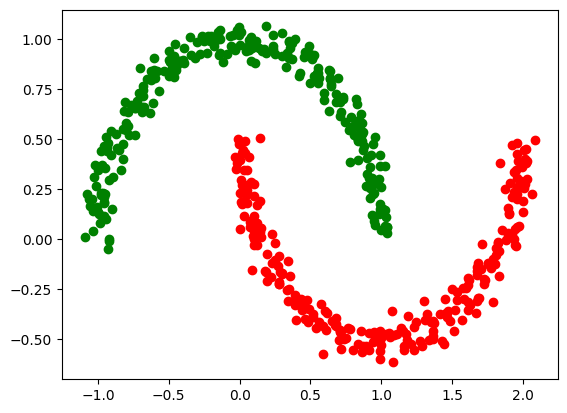

In [18]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='green')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red');

# 2) Spam ditection:

<img src="https://miro.medium.com/v2/resize:fit:1400/1*V9ac4hLVyms79jl65Ym_Bw.jpeg">

In [ ]:
data = pd.read_csv('..')

# 3) Model evaluation